-3.8539271569621008
10.167553896080477


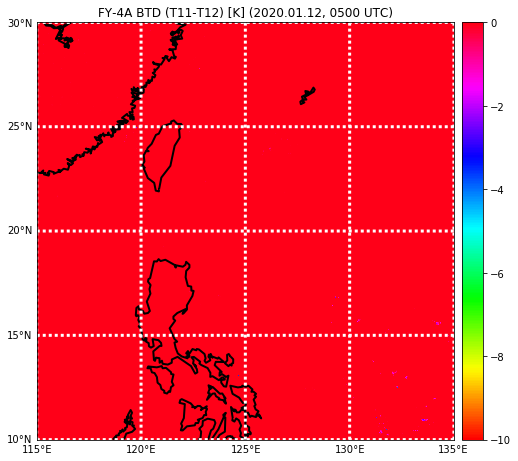

-5.600016948580048
10.559770970595821


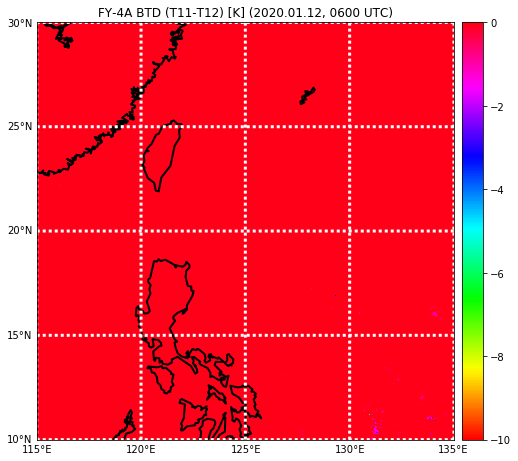

-5.88495020421675
10.773537545159172


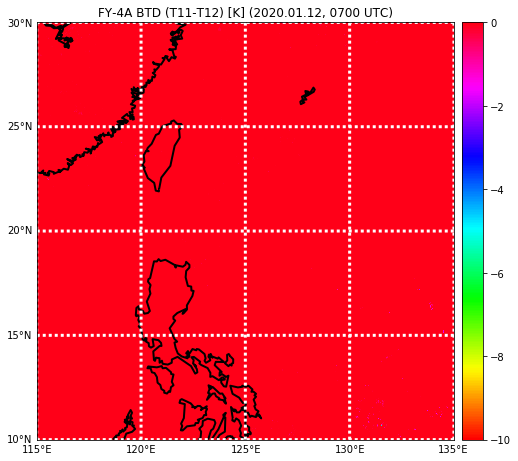

-4.76199585845589
19.013003474784682


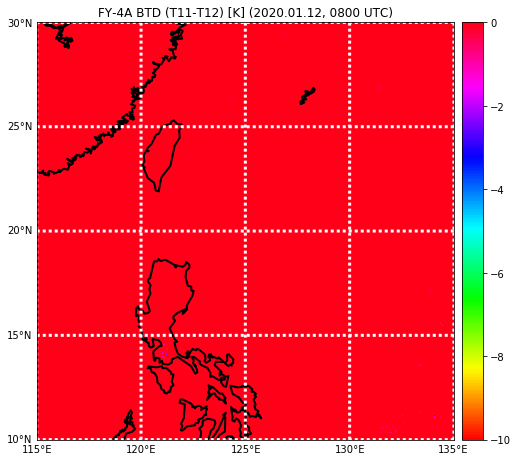

-8.486069442354108
16.032839814922596


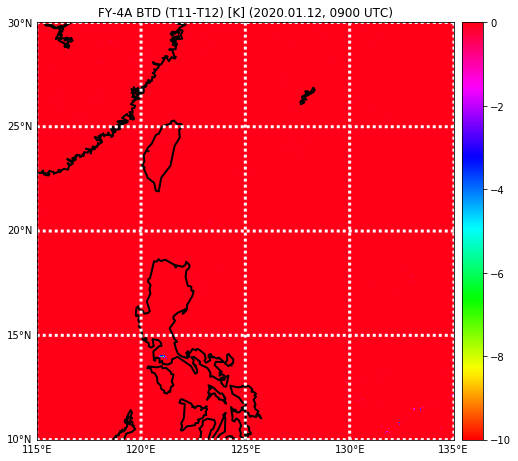

-2.918832405173191
14.847846059106956


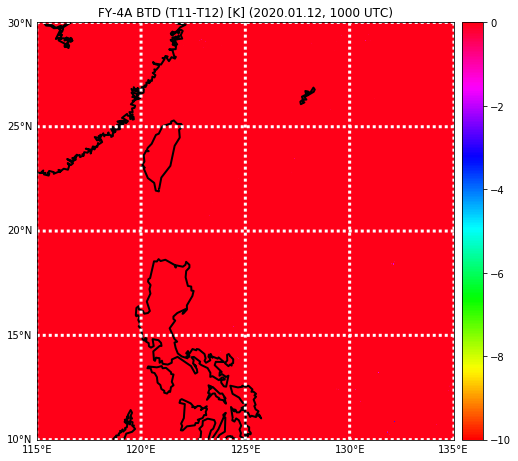

-4.422594530581904
18.029443081303754


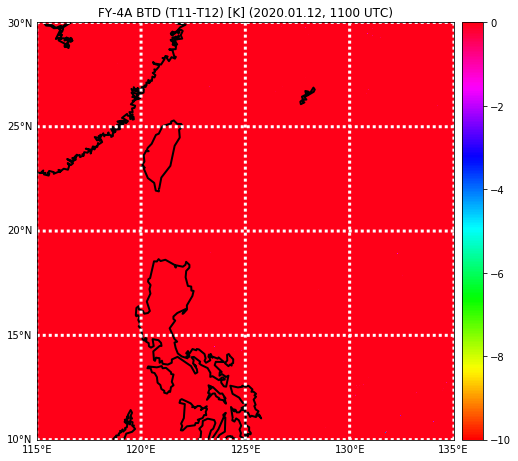

-4.216292552426125
14.32724263974194


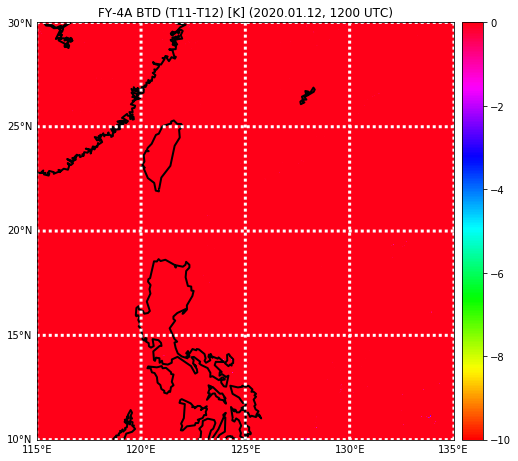

-3.2382337681015088
13.975547797391528


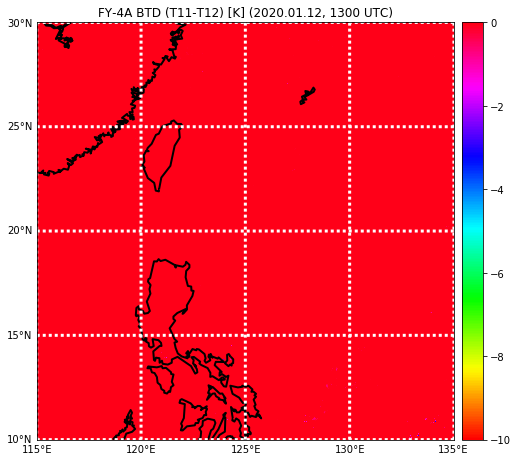

-4.7456098124145285
16.33886919631027


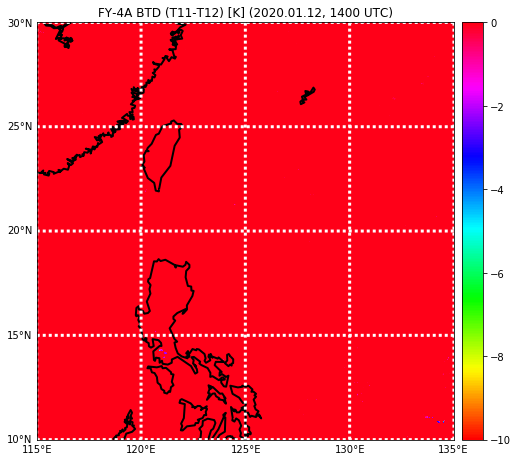

-6.470225836801433
16.115966116430457


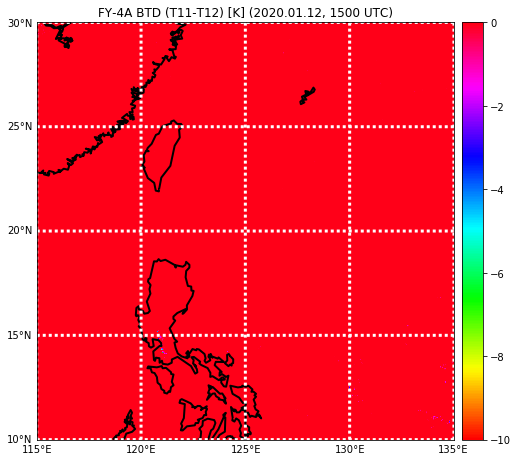

-3.054880676835552
14.931374841479368


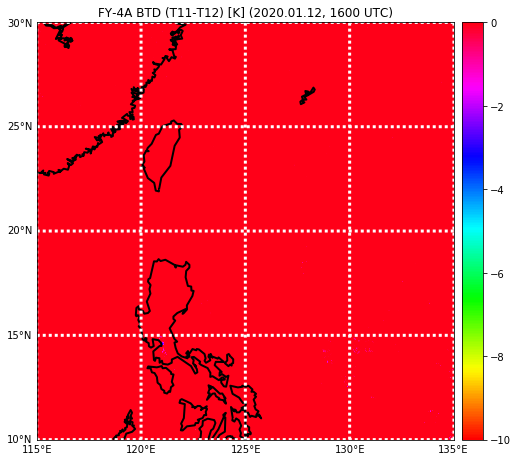

-3.818682785889024
11.929325451413803


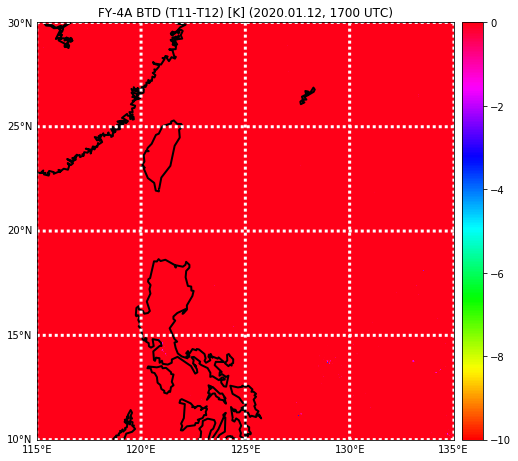

-2.8931328949209387
13.18517149009466


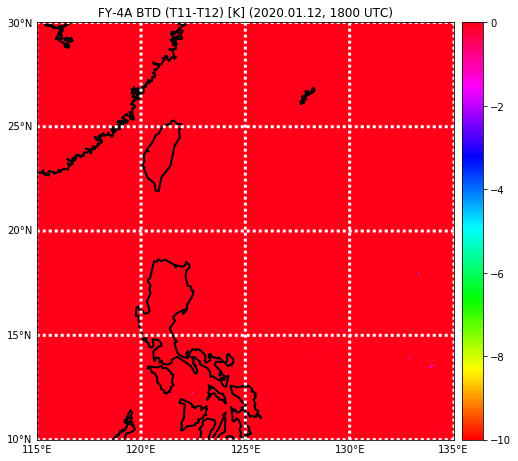

-2.6259892958032083
12.379995389156704


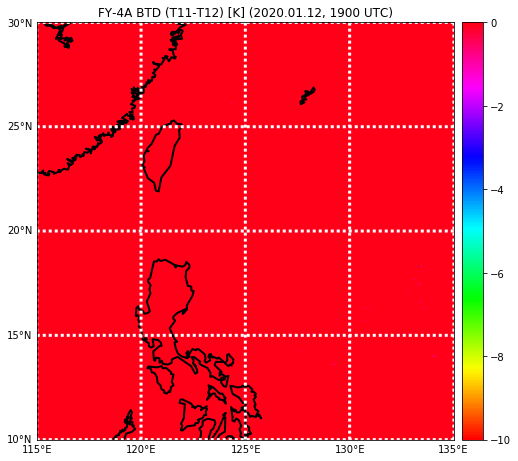

-2.712398081839467
14.985580543003351


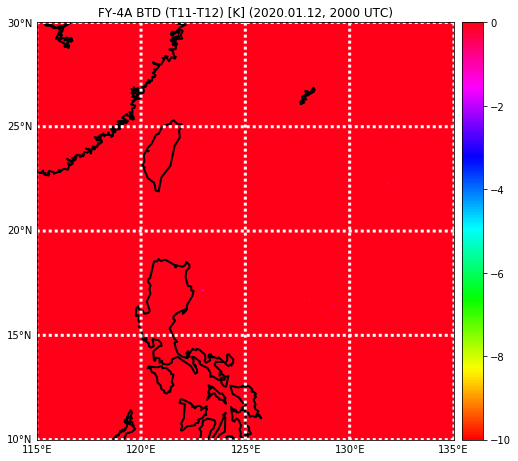

-2.3699362208252808
12.400223530111845


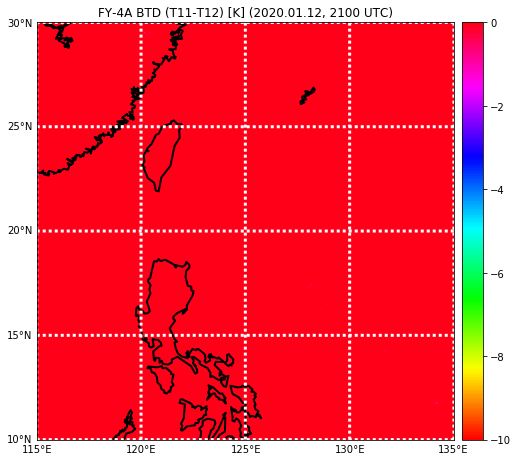

-5.001741570676529
11.124848779093384


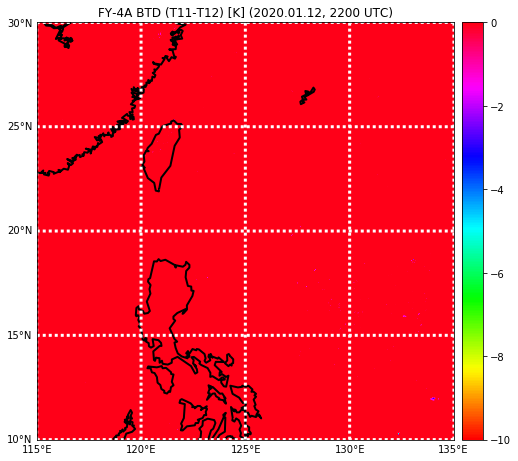

-5.205780643076167
11.5663593044614


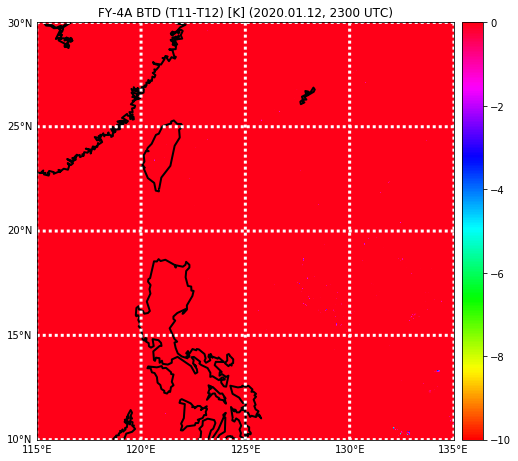

In [21]:
# To plot FY-4A BTD plot (T11-T12) by jhlee

import os
os.environ['PROJ_LIB']='/home/jhlee/anaconda3/envs/JUPYTER/share/proj'
from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np


# file path
dir = '/storage1/jhlee/NMSC_2018/FY_4A_AGRI/'


# Read 4 km lat/lon
f = Dataset(dir + 'LatLon_4000m.nc', 'r')
lat = f.variables['Latitude'][:]
lon = f.variables['Longitude'][:]


# Const. Convert DN to TB
scale_11  = -0.003990
offset_11 = 16.344793
lamda_11  = 10.8

scale_12  = -0.003503
offset_12 = 14.354327
lamda_12  = 12.0

c1 = 1.191042E08  # W/m2-sr-um
c2 = 1.4387752E04 # K/um


# Const. Target area
llcrnrlat = 10
urcrnrlat = 30
llcrnrlon = 115
urcrnrlon = 135


# Read FY-4A channel 12 and 13 digital numbers
hr = ['05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
for i in hr:
    year = '2020'
    month = '01'
    day = '12'
    hour = i
    sttime = year + month + day + hour
    fname = dir + 'FY4A-_AGRI--_N_DISK_1047E_L1-_FDI-_MULT_NOM_'+sttime+'0000_'+sttime+'1459_4000M_V0001.HDF'
    f = Dataset(fname, 'r')
    dn11 = f.variables['NOMChannel12'][:]
    dn12 = f.variables['NOMChannel13'][:]

# Convert DN to TB
    rad_11 = scale_11 * dn11 + offset_11
    rad_12 = scale_12 * dn12 + offset_12

    tb_11 = c2 / ( lamda_11 * np.log( 1.+ c1/(rad_11 * lamda_11 **5) ) )
    tb_12 = c2 / ( lamda_12 * np.log( 1.+ c1/(rad_12 * lamda_12 **5) ) )


# Target area
    btd_11_12 = tb_11 - tb_12
    btd_11_12[lat < llcrnrlat] = np.nan
    btd_11_12[lat > urcrnrlat] = np.nan
    btd_11_12[lon < llcrnrlon] = np.nan
    btd_11_12[lon > urcrnrlon] = np.nan


# Plot BTD (T11-T12) map
    plt.figure(figsize=(8,8))


    map = Basemap(projection='cyl', llcrnrlat= llcrnrlat, urcrnrlat = urcrnrlat,\
                  llcrnrlon = llcrnrlon, urcrnrlon = urcrnrlon, resolution = 'l')

    x, y = map(lon, lat)

    # Taal volcano position
    xi, yi = map(121, 14)
#    map.plot(xi, yi, 'm^', markersize=13)
    
    cs = map.pcolormesh(x,y,btd_11_12, shading='flat', cmap=plt.cm.hsv)

    map.drawcoastlines(linewidth=2)

    map.drawparallels(np.arange(llcrnrlat,urcrnrlat+1,5.), labels=[True,False,False,False], color='white', linewidth=3.0)
    map.drawmeridians(np.arange(llcrnrlon,urcrnrlon+1,5.), labels=[False,False,False,True], color='white', linewidth=3.0)

    plt.clim(-10,0) # colorbar range
    cb = map.colorbar(cs, "right")

# show result plot
    print(np.nanmin( btd_11_12))
    print(np.nanmax( btd_11_12))
    plt.title('FY-4A BTD (T11-T12) [K] (%s.%s.%s, %s00 UTC)' %(year, month, day, hour))
#    plt.savefig('../plots/FY4A_BTD/FY4A_BTD_11_12_'+sttime+'0000.png', dpi=300)
    plt.show()